## Decision Trees. Classification

In [30]:
import warnings
warnings.filterwarnings('ignore')

Linear methods have a number of important advantages:

- They learn quickly
- They are able to work with a large number of objects and features
- They have a small number of parameters
- They are easily regularized

At the same time, they also have a serious drawback - they can only restore linear dependencies between the target variable and features. Of course, you can add new features to the sample, which nonlinearly depend on the initial ones, but this approach is purely heuristic, requires a choice of the type of nonlinearity, and also still limits the complexity model complexity of features (for example, if the features are quadratic, then the model can only recover second-order dependencies).


The first work on the use of decision trees for data analysis appeared in the 60s, and since then they have received a lot of attention for several decades. Despite their interpretability and high expressive power, trees are extremely difficult to optimize due to their discrete structure - the tree cannot be differentiated by parameters and at least a local optimum cannot be found using gradient descent. Moreover, even the number of parameters they have is not constant and may vary depending on the depth, choice of crushing criteria and other details. Because of this, all methods for constructing decisive trees are greedy and heuristic.


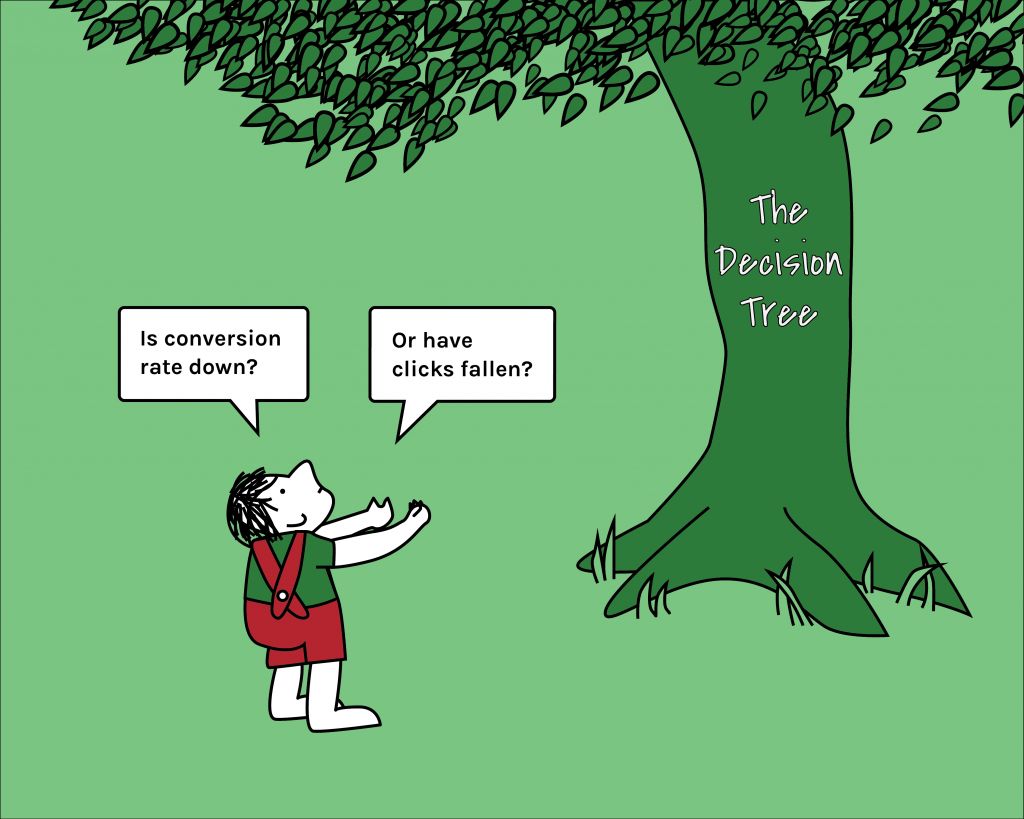

In [78]:
from IPython import display
display.Image("hhh.png", width = 700, height = 400)

## Greedy approach to constract a decision tree

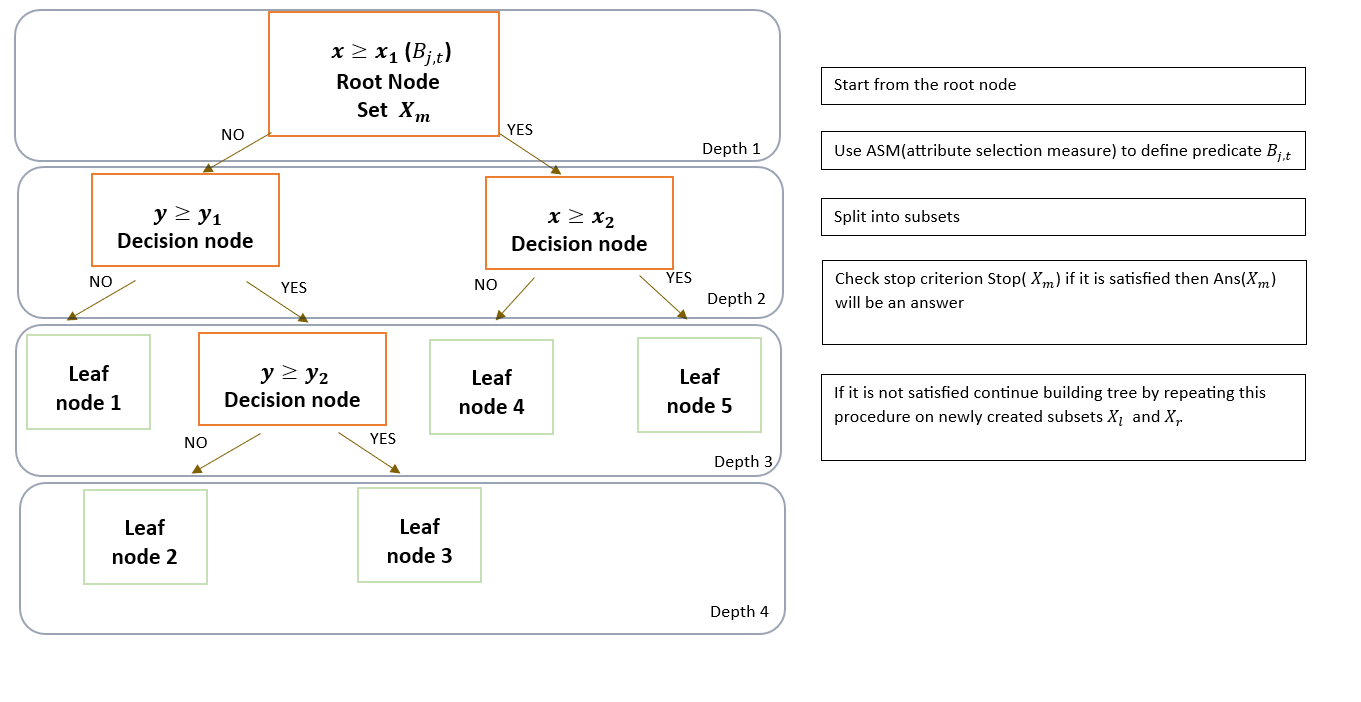

In [33]:
from IPython import display
display.Image("hhh2.png", width = 700, height = 400)

In [19]:
from jupyterquiz import display_quiz
import json
from base64 import b64decode
import re

encoded_quiz1 = '<span style="display:none" id="example">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyBhIGxlYWYgbm9kZSBpbiBhIGNsYXNzaWZpY2F0aW9uIHRyZWU/IiwgInR5cGUiOiAibXVsdGlwbGVfY2hvaWNlIiwgImFuc3dlcnMiOiBbeyJjb2RlIjogIlRoZSB0b3Btb3N0IG5vZGUiLCAiY29ycmVjdCI6IGZhbHNlfSwgeyJjb2RlIjogIkEgbm9kZSB3aXRoIG5vIGNoaWxkcmVuIiwgImNvcnJlY3QiOiB0cnVlfSwgeyJjb2RlIjogIlRoZSBub2RlIHdpdGggdGhlIGhpZ2hlc3QgR2luaSBpbXB1cml0eSIsICJjb3JyZWN0IjogZmFsc2V9LCB7ImNvZGUiOiAiQSBub2RlIHdpdGggdGhlIGxvd2VzdCBpbmZvcm1hdGlvbiBnYWluIiwgImNvcnJlY3QiOiBmYWxzZX1dfV0=</span>'
encoded_quiz2 = '<span style="display:none" id="example1">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyBHaW5pIGltcHVyaXR5IHVzZWQgZm9yIGluIHRoZSBjb250ZXh0IG9mIGNsYXNzaWZpY2F0aW9uIHRyZWVzPyIsICJ0eXBlIjogIm11bHRpcGxlX2Nob2ljZSIsICJhbnN3ZXJzIjogW3siY29kZSI6ICJUbyBtZWFzdXJlIHRoZSBhdmVyYWdlIHNxdWFyZWQgZGlmZmVyZW5jZSBiZXR3ZWVuIHByZWRpY3RlZCBhbmQgYWN0dWFsIHZhbHVlcyIsICJjb3JyZWN0IjogZmFsc2V9LCB7ImNvZGUiOiAiVG8gbWVhc3VyZSB0aGUgaW1wdXJpdHkgb2YgYSBzZXQgb2YgbGFiZWxzIiwgImNvcnJlY3QiOiB0cnVlfSwgeyJjb2RlIjogIlRvIGNhbGN1bGF0ZSB0aGUgZW50cm9weSBvZiBhIGRhdGFzZXQiLCAiY29ycmVjdCI6IGZhbHNlfSwgeyJjb2RlIjogIlRvIGRldGVybWluZSB0aGUgbnVtYmVyIG9mIGZlYXR1cmVzIGluIGEgZGF0YXNldCIsICJjb3JyZWN0IjogZmFsc2V9XX1d</span>'
encoded_quiz3 = '<span style="display:none" id="q_demo_seq">W3sicXVlc3Rpb24iOiAiSWYgYSBkZWNpc2lvbiB0cmVlIGhhcyBhIHRvdGFsIG9mIDUgbGVhZiBub2RlcyBhbmQgZWFjaCBsZWFmIG5vZGUgY29ycmVzcG9uZHMgdG8gYSB1bmlxdWUgY2xhc3MsIHdoYXQgaXMgdGhlIG1heGltdW0gbnVtYmVyIG9mIGNsYXNzZXMgdGhlIHRyZWUgY2FuIHByZWRpY3Q/IiwgInR5cGUiOiAibnVtZXJpYyIsICJhbnN3ZXJzIjogW3sidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDUsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIlRoZSBtYXhpbXVtIG51bWJlciBvZiBjbGFzc2VzIGEgdHJlZSB3aXRoIG4gbGVhZiBub2RlcyBjYW4gcHJlZGljdCBpcyBuLiBUaGVyZWZvcmUsIHRoZSBhbnN3ZXIgaXMgNS4ifSwgeyJ0eXBlIjogInZhbHVlIiwgInZhbHVlIjogNCwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIk5vdCBxdWlldCBsaWtlIHRoYXQgdHJ5IGFnYWluISJ9LCB7InR5cGUiOiAidmFsdWUiLCAidmFsdWUiOiA2LCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiTm90IHF1aWV0IGxpa2UgdGhhdCB0cnkgYWdhaW4hIn0sIHsidHlwZSI6ICJkZWZhdWx0IiwgImZlZWRiYWNrIjogIk5vIFdheSEgVHJ5IGFnYWluISJ9XX1d</span>'
encoded_quiz4 = '<span style="display:none" id="q_demo_seq1">W3sicXVlc3Rpb24iOiAiQSBkZWNpc2lvbiB0cmVlIGlzIHRyYWluZWQgb24gYSBkYXRhc2V0IHdpdGggMTAwMCBzYW1wbGVzLiBBZnRlciB0cmFpbmluZywgaXQgaGFzIDggbGVhZiBub2Rlcy4gV2hhdCBpcyB0aGUgbWF4aW11bSBkZXB0aCBvZiB0aGlzIGRlY2lzaW9uIHRyZWU/IiwgInR5cGUiOiAibnVtZXJpYyIsICJhbnN3ZXJzIjogW3sidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDMsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkluIGEgYmluYXJ5IHRyZWUsIHRoZSBtYXhpbXVtIGRlcHRoIGlzIHRoZSBudW1iZXIgb2YgbGV2ZWxzLCB3aGljaCBpcyBsb2cyKE51bWJlciBvZiBMZWFmIE5vZGUpLiJ9LCB7InR5cGUiOiAidmFsdWUiLCAidmFsdWUiOiA0LCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiTm90IHF1aWV0IGxpa2UgdGhhdCB0cnkgYWdhaW4hIn0sIHsidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDUsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJOb3QgcXVpZXQgbGlrZSB0aGF0IHRyeSBhZ2FpbiEifSwgeyJ0eXBlIjogImRlZmF1bHQiLCAiZmVlZGJhY2siOiAiTm8gV2F5ISBUcnkgYWdhaW4hIn1dfV0=</span>'
encoded_quiz5 = '<span style="display:none" id="q_e_trillions12">W3sicXVlc3Rpb24iOiAiU3VwcG9zZSB5b3UgaGF2ZSBhIGRhdGFzZXQgd2l0aCA1MDAgc2FtcGxlcyBhbmQgdHdvIGNsYXNzZXMgKDAgYW5kIDEpLiBJZiAzMDAgc2FtcGxlcyBiZWxvbmcgdG8gY2xhc3MgMCBhbmQgMjAwIHNhbXBsZXMgYmVsb25nIHRvIGNsYXNzIDEsIHdoYXQgaXMgdGhlIEdpbmkgaW1wdXJpdHkgb2YgdGhlIGVudGlyZSBkYXRhc2V0PyIsICJ0eXBlIjogIm1hbnlfY2hvaWNlIiwgImFuc3dlcnMiOiBbeyJhbnN3ZXIiOiAiMC4zMiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJOb3QgZW5vdWdoISJ9LCB7ImFuc3dlciI6ICIwLjIyIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIk5vdCBlbm91Z2ghIn0sIHsiYW5zd2VyIjogIjAuNDQiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJZZXAgdGhhdCdzIHJpZ2h0In0sIHsiYW5zd2VyIjogIjExMDAwMC8yNTAwMDAiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJZZXAgdGhhdCdzIHJpZ2h0In1dfV0=</span>'



encoded_quizzes = [encoded_quiz1, encoded_quiz2, encoded_quiz3, encoded_quiz4, encoded_quiz5]

quiz_results = []

for encoded_quiz in encoded_quizzes:
    matches = re.search(r'id="[^"]*">(.*?)</span>', encoded_quiz)
    if matches:
        encrypted_value = matches.group(1)

        decoded_quiz = b64decode(encrypted_value).decode('utf-8')
        quiz_results.append(json.loads(decoded_quiz))

quiz_result1, quiz_result2, quiz_result3, quiz_result4, quiz_result5 = quiz_results

In [10]:
display_quiz(quiz_result1)

<IPython.core.display.Javascript object>

***
Decision surface to this decision tree will look like this
***

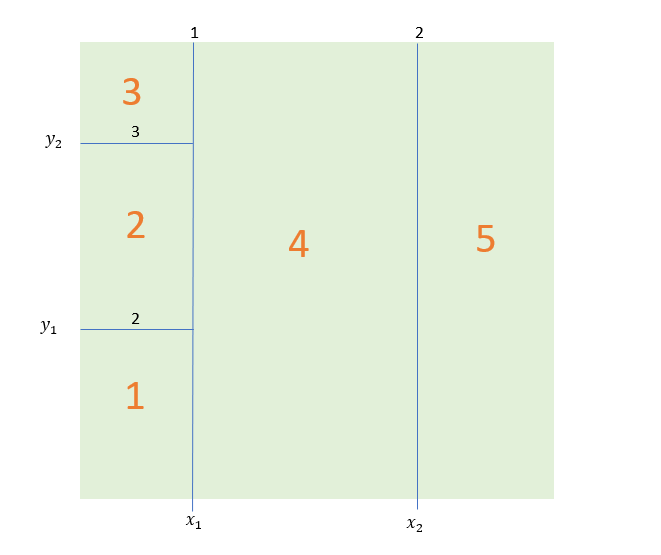

In [4]:
from IPython import display
display.Image("hhh3.png", width = 700, height = 400)

## Lets dive in to this process. Attribute selection measures

## 1. Gini criterion

Consider the error indicator as a loss function:

$$ H(R) = \min_{c \in Y} \frac{1}{|R|} \sum_{(x_i,y_i) \in R} [y_i \neq c]. $$

$H(R)$: This denotes the empirical risk or empirical error for the set of labeled data represented by $R$. The goal is to find a classifier $c$ that minimizes this risk.

$\min_{c \in Y}$: The function seeks the minimum value among all possible classifiers $c$ belonging to the set $Y$. In this context, $Y$ represents the set of possible classifiers or hypotheses.

$\frac{1}{|R|} \sum_{(x_i,y_i) \in R} [y_i \neq c]$: This part calculates the average over the size of the dataset $R$. It normalizes the sum of errors by dividing by the total number of samples in $R$.
$\sum_{(x_i,y_i) \in R}$: This denotes the summation over all the samples $(x_i, y_i)$ in the dataset $R$.
$[y_i \neq c]$: This is an indicator function that evaluates to $1$ if the predicted label by the classifier $c$ is not equal to the true label $y_i$, and $0$ otherwise. Essentially, it counts the number of misclassifications made by the classifier $c$ on the dataset $R$.

The formula aims to find the classifier $c$ from the set of possible classifiers $Y$ that minimizes the average error over the given dataset $R$. It computes the empirical risk by averaging the number of misclassifications made by the classifier $c$ across all the samples in $R$. The goal is to find the classifier that minimizes this empirical risk, which represents how well the classifier performs on the given dataset.

In practical machine learning terms, this formula represents the process of choosing the hypothesis (classifier) that minimizes the error on the training data. The choice of $c$ from the set $Y$ is made based on its performance in correctly predicting the labels of the samples in the dataset $R$.

It is easy to see that the optimal prediction here will be the most popular class $(k_{\ast})$, which means the criterion will be equal to the following error rate:

$$ H(R) = \frac{1}{|R|} \sum_{(x_i,y_i) \in R} [y_i \neq k_{\ast}] = 1 - p_{k_{\ast}}. $$


In [13]:
display_quiz(quiz_result2)

<IPython.core.display.Javascript object>

## 2. Entropy criterion

Let's consider a scenario where we're not just assigning a single class to a vertex, but rather a distribution across all classes $c = (c_1, \ldots, c_K)$ with $\sum_{k=1}^{K} c_k = 1$. To measure the quality of such a distribution, one approach is to use the Brier score:

$$ H(R) = \min_{\sum_k c_k=1} \frac{1}{|R|} \sum_{(x_i,y_i) \in R} \sum_{k=1}^{K} (c_k - [y_i=k])^2. $$

- **$H(R)$**: Represents the empirical risk or empirical error for the set of labeled data $R$.
- **$\min_{\sum_k c_k=1}$**: Seeks the minimum value among all possible coefficient combinations $c_k$ while ensuring that their sum equals 1, forming a probability distribution.
- **$\frac{1}{|R|} \sum_{(x_i,y_i) \in R} \sum_{k=1}^{K} (c_k - [y_i=k])^2$**: Normalizes the sum of squared differences across the dataset $R$ between predicted coefficients $c_k$ and indicator functions $[y_i=k]$ for each class.

It's notable that the optimal probability vector comprises class shares $p_k$:

$ c_{\ast} = (p_1, \ldots, p_K) $

By substituting these probabilities into the original criterion and conducting a series of transformations, the Gini criterion is obtained:

$$ H(R) = \sum_{k=1}^{K} p_k (1-p_k). $$

This criterion aims to evaluate the quality of the distribution in terms of class probabilities, offering insights into the predictive performance of the model in a machine learning context.


## Trees are growing! When it should stop?

How deep should the tree go? We decide on a limit. Just like a game where you set a maximum number of moves, here, we set a maximum number of questions (decisions) the tree can ask before giving an answer(max_depth)

Should we keep splitting or stop? If we notice that there aren't many examples left to make decisions on (like only a few people in a group), it might not make sense to divide further. So, we set a rule that if there are very few examples in a group, we won’t divide it anymore(min_samples_leaf)

What's the smallest group we'll accept? We decide on the minimum number of examples (people, items, etc.) that should be in a group before we stop dividing it. If there are only a couple of examples left in a group, we might as well stop asking more questions about them(min_samples_split)

In [14]:
display_quiz(quiz_result3)

<IPython.core.display.Javascript object>

## Dataset has missing values? It is not a problem!

````{admonition} Dataset has missing values? It is not a problem!
:class: dropdown
Decision tree can handle missing values:

1.Defin$X_m$ 
 is set of samples a$V_m$  
 is set of of sample with missing values

2.Decision tree will ignore missing values when it split set

3.When splitting is done, valu$V_m$es from 
 will go to both subsets and their wei\frac $X_l${$X_m$}ght will 
 
 for le\frac $X_r${$X_m$} ubset, 
 
 for right s$X_l$bset (where 
 is$X_rleft subset, 
 is right subset)
````


*** 
## Now let's see how decision tree works on datasets.
First of all import all needed libraries: 
***

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
import numpy as np
from sklearn.datasets import fetch_openml

***
Create classification dataset using make_classification function. Dataset consist of 200 samples, 2 features, 4 classes.
***


In [6]:
X,Y=datasets.make_classification(n_samples=200,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1, n_repeated=0,n_classes=4)

In [7]:
X.shape,Y.shape 

((200, 2), (200,))

***
Here is plot of the prediction model:
***

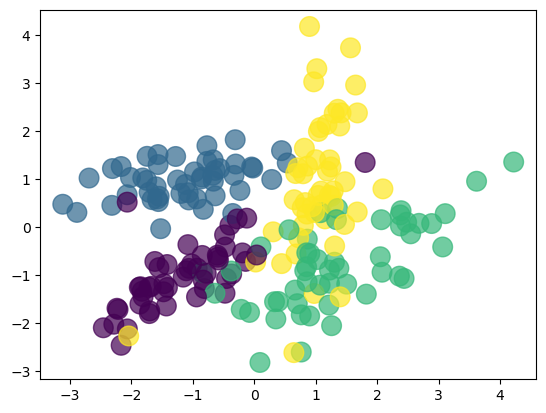

In [8]:
plt.scatter(X[:, 0],X[:, 1],c=Y,s=200,alpha=0.7) #visualize our dataset

***
Make train-test split:
***

In [9]:
 X_train, X_test, y_train, y_test = train_test_split(X,Y) 

***
Import needed library for model, build that based on DecisionTreeClassifier() and train a model: 
***

In [10]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
def plot_dtree(dtree):

 _ = tree.plot_tree(dtree, 
                   feature_names=['feature1','feature2'],  
                   class_names=['class1','class2','class3','class4'],
                   filled=True)

***
Function plots tree based on model:
***

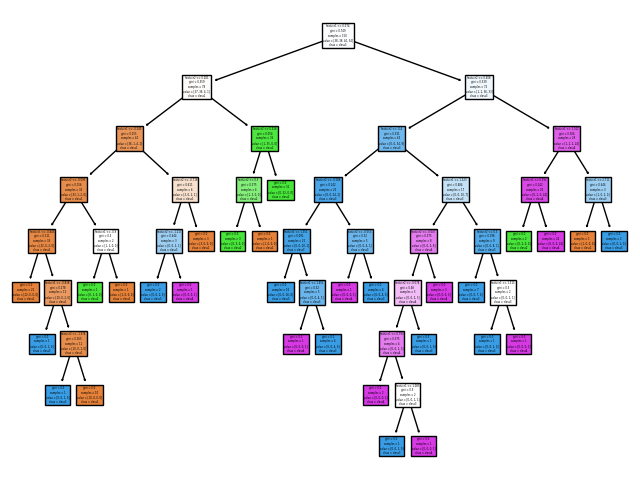

In [12]:
plt.figure(figsize=(8,6))
plot_dtree(dtree)

In [21]:
display_quiz(quiz_result4)

<IPython.core.display.Javascript object>

`Here is some code for decision surface !`

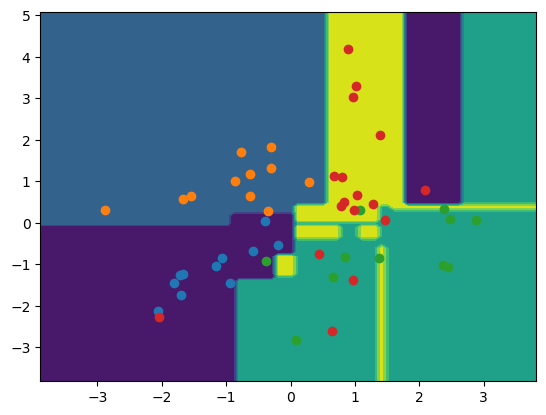

In [13]:
def plot_decision_surface(X,Y,dtree):
    
    # define bounds of the domain
    min1,max1 = X[:, 0].min()-1,X[:, 0].max()+1
    min2,max2 = X[:, 1].min()-1,X[:, 1].max()+1
    
    # create all of the lines and rows of the grid
    x,y = np.meshgrid(np.arange(min1,max1,0.1),np.arange(min2,max2,0.1))
    
    # flatten each grid to a vector
    r1,r2 = x.flatten(),y.flatten()
    r11,r22 = r1.reshape((len(r1),1)),r2.reshape((len(r2),1))
    
    
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r11,r22))
    
    # make predictions, reshape the predictions back into a grid
    yy = dtree.predict(grid)
    z = yy.reshape(x.shape)
    
    # plot the grid of x, y and z values as a surface
    c = plt.contourf(x,y,z)
    for i in range(4):
        xx = np.where(Y==i)
        plt.scatter(X[xx,0],X[xx,1])
    plt.show()

plot_decision_surface(X_test,y_test,dtree)

***
Let's see how hyperparameters affect tree! Starting with max_depth
***

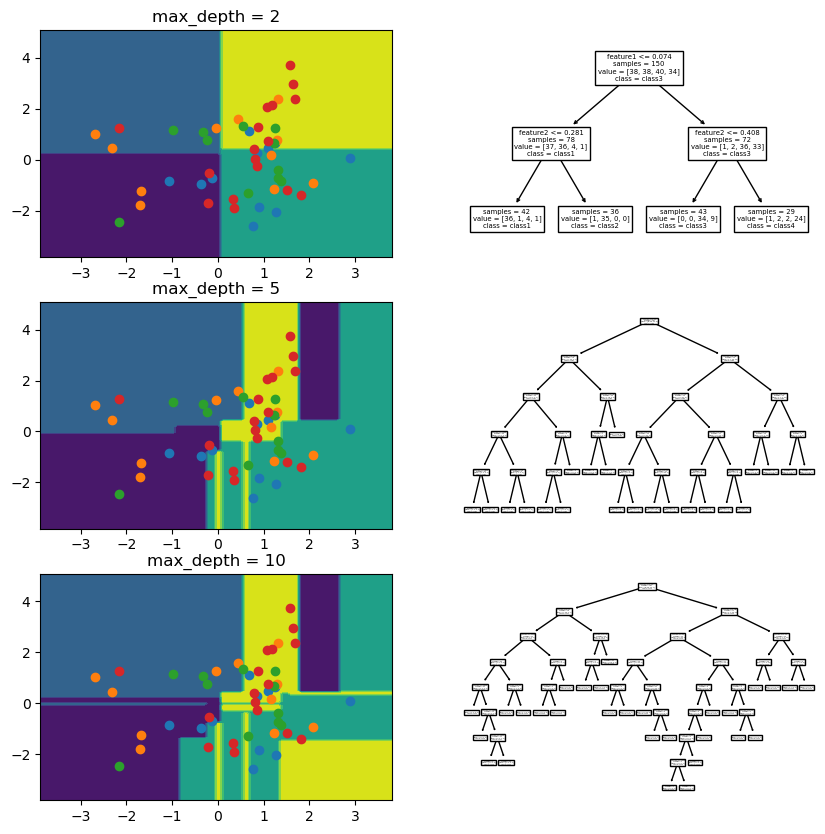

In [14]:
#instead of before listed code i recommend to use this 
l = ['ax1','ax2','ax3','ax4','ax5','ax6']
nms = ['max_depth = 2', 'max_depth = 5', 'max_depth = 10']
fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(10, 10))
a = 0
k = 0
lst=[]
for max_depth in [2,5,10]:
    dtree=DecisionTreeClassifier(max_depth=max_depth)
    dtree.fit(X_train,y_train)
    min1,max1=X_test[:, 0].min()-1,X_test[:, 0].max()+1
    min2,max2=X_test[:, 1].min()-1,X_test[:, 1].max()+1
    x,y=np.meshgrid(np.arange(min1,max1,0.1),np.arange(min2,max2,0.1))
    r1,r2=x.flatten(),y.flatten()
    r11,r22=r1.reshape((len(r1),1)),r2.reshape((len(r2),1))
    grid=np.hstack((r11,r22))
    yy=dtree.predict(grid)
    z=yy.reshape(x.shape)
    c=eval(l[a]).contourf(x,y,z)
    for i in range(4):
        xx=np.where(y_test==i)
        eval(l[a]).scatter(X[xx,0],X[xx,1])
    eval(l[a]).title.set_text(nms[k])
    k+=1
    a+=1
    tree.plot_tree(
     dtree,
     feature_names=['feature1','feature2'],
     class_names=['class1','class2','class3','class4'],
     impurity=False,
     ax=eval(l[a]),
     )
    a+=1
    lst.append(dtree.score(X_test, y_test))

***
Play on max_depth parameter ranging between of 2 and 20 and watch how accuracy will change depending on this:
***

In [15]:
##Added by Aigerim
lst=[]
for max_depth in range (2,20):
    dtree=DecisionTreeClassifier(max_depth=max_depth)
    dtree.fit(X_train,y_train)
    lst.append(dtree.score(X_test, y_test))
    
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

x_lst = []
lst_depth = lst[:]
for i in range (2,20):
    x_lst.append(i)
dict_depth = {}

for i in x_lst:
    for j in lst_depth:
        dict_depth[i] = j
        lst_depth.remove(j)
        break
        
def f(max_depth):
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True  
    plt.plot(max_depth, dict_depth[max_depth], marker="o", markersize=20, markeredgecolor="red", markerfacecolor="green")
    plt.plot(x_lst, list(dict_depth.values()))
    plt.xlim(1, 20)
    plt.ylim(0, 1)
    plt.grid()
interact(f, max_depth=(2,19));

interactive(children=(IntSlider(value=10, description='max_depth', max=19, min=2), Output()), _dom_classes=('w…

***
Models based on criterions: 'gini', 'entropy'
***

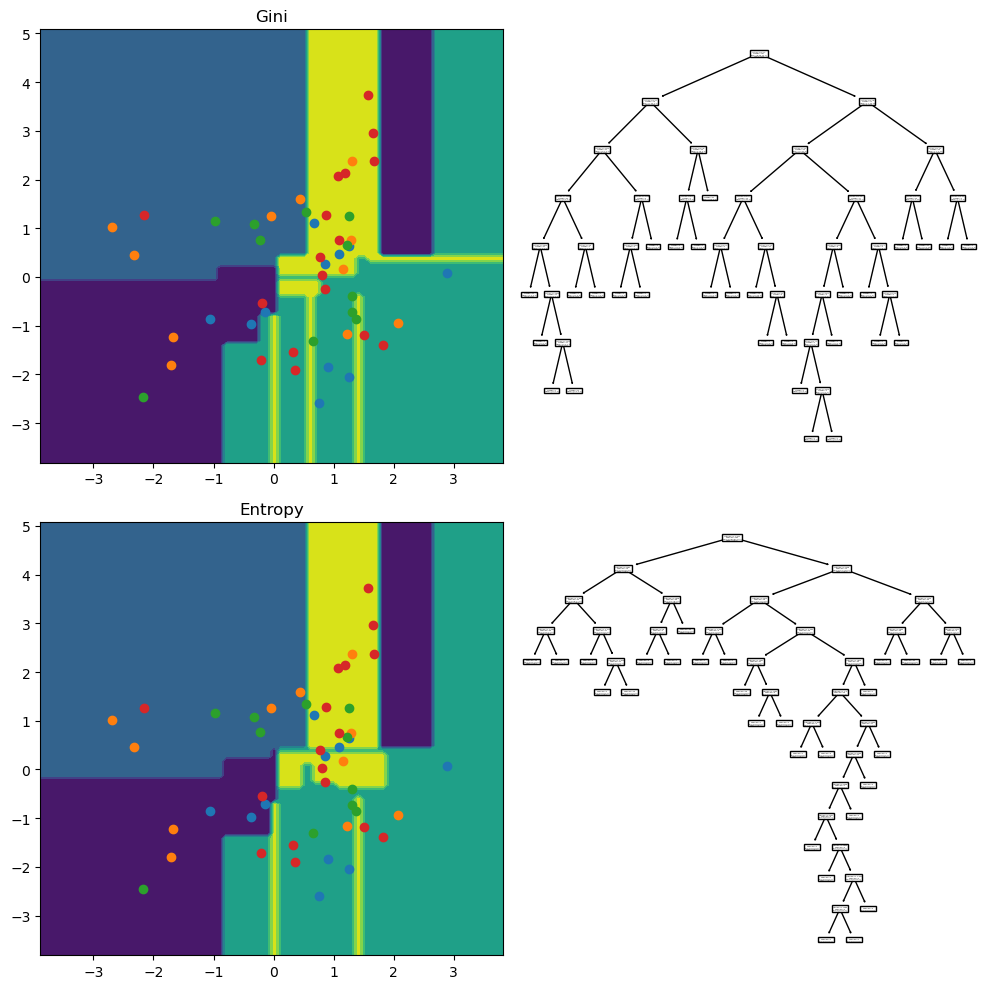

In [16]:
l = ['ax1','ax2','ax3','ax4']
nms = ['Gini','Entropy']
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10, 10))
a = 0
k=0
lst=[]
for criterion in ['gini','entropy']:
    dtree=DecisionTreeClassifier(criterion=criterion)
    dtree.fit(X_train,y_train)
    min1,max1=X_test[:, 0].min()-1,X_test[:, 0].max()+1
    min2,max2=X_test[:, 1].min()-1,X_test[:, 1].max()+1
    x,y=np.meshgrid(np.arange(min1,max1,0.1),np.arange(min2,max2,0.1))
    r1,r2=x.flatten(),y.flatten()
    r11,r22=r1.reshape((len(r1),1)),r2.reshape((len(r2),1))
    grid=np.hstack((r11,r22))
    yy=dtree.predict(grid)
    z=yy.reshape(x.shape)
    c=eval(l[a]).contourf(x,y,z)
    for i in range(4):
        xx=np.where(y_test==i)
        eval(l[a]).scatter(X[xx,0],X[xx,1])
    eval(l[a]).title.set_text(nms[k])
    k+=1
    a+=1
    tree.plot_tree(
     dtree,
     feature_names=['feature1','feature2'],
     class_names=['class1','class2','class3','class4'],
     impurity=False,
     ax=eval(l[a]),
     )
    a+=1
    lst.append(dtree.score(X_test, y_test))

***
Scores of models depending on min_sample_split in range (2, 150) displayed here:
***

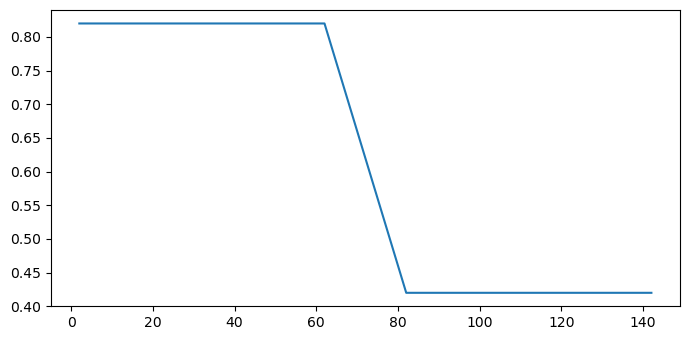

In [18]:
#min_sample_split
lst=[]
for min_sample_split in np.arange(2,150,20):
    dtree=DecisionTreeClassifier(min_samples_split=min_sample_split)
    dtree.fit(X_train,y_train)
    lst.append(dtree.score(X_test, y_test))
plt.plot(np.arange(2,150,20),lst)
plt.show()

In [20]:
display_quiz(quiz_result5)

<IPython.core.display.Javascript object>

***
So now let's move on to a real dataset cifar10
***

In [19]:
from matplotlib import pyplot
from keras.datasets import cifar10

(X_train,y_train), (X_test,y_test) = cifar10.load_data()

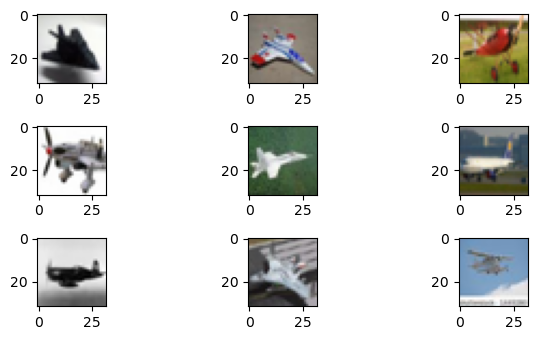

In [20]:
# Select 2 types from cifar10 dataset : plains and cars
class_0_idx = np.where(y_train == 0)[0][:10000]
class_1_idx = np.where(y_train == 1)[0][:10000]
selected_idx = np.concatenate((class_0_idx, class_1_idx))

# Make sets X,y based on classes
X = X_train[selected_idx]
y= y_train[selected_idx]

# Plot graph based on data
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X[i])
plt.show()

***
Split data into train and test:
***

In [21]:
X_train_init, X_test_init, y_train_init, y_test_init = train_test_split(X,y)

***
Check the shapes of data:
***

In [22]:
X_train_init.shape,y_train_init.shape

((7500, 32, 32, 3), (7500, 1))

***
Reshape train and test dataset and change types of entries to fit model:
***

In [23]:
# Train-test split
X_train,y_train=X_train_init.reshape(len(X_train_init),-1),y_train_init.reshape(len(y_train_init),)
X_test,y_test=X_test_init.reshape(len(X_test_init),-1),y_test_init.reshape(len(y_test_init),)

# Change types
X_train=X_train.astype('float') / 255
y_train=y_train.astype('int')
X_test=X_test.astype('float')/255
y_test=y_test.astype(int) 

***
Fit model based on DecisionTreeClassifier:
***

In [24]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print(dtree.score(X_test, y_test))

0.7624


***
Let's see how our model work on random samples
***

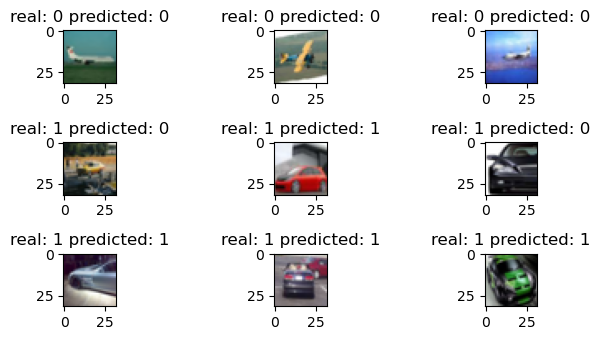

<Figure size 700x350 with 0 Axes>

In [25]:
import random

y_pred=dtree.predict(X_test)
for i in range(9):
    j=random.randrange(0,len(y_test), 1)
    plt.subplot(330 + 1 + i)
    plt.imshow(X_test_init[j])
    title="real: "+ str(y_test[j])+' predicted: '+str(y_pred[j])
    plt.title(title)
plt.show()
plt.tight_layout()

***
There are some better models which use decision tree 
***

In [27]:
from sklearn.ensemble import BaggingClassifier
bm = BaggingClassifier(dtree,n_estimators=10)
bm.fit(X_train,y_train)
print('Test score for BaggingClassifier: ',bm.score(X_test, y_test))

from sklearn.ensemble import RandomForestClassifier
rnd=RandomForestClassifier()
rnd.fit(X_train,y_train)
print('Test score for RandomForestClassifier: ',rnd.score(X_test, y_test))

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
print('Test score for GradientBoostingClassifier: ',gb.score(X_test, y_test))

Test score for BaggingClassifier:  0.844
Test score for RandomForestClassifier:  0.872
Test score for GradientBoostingClassifier:  0.8732
